<a href="https://colab.research.google.com/github/24KN5A/Bitcoin_price_detection/blob/main/BTC_PREDICT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


(2713, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
               Open          High           Low         Close     Adj Close  \
count   2713.000000   2713.000000   2713.000000   2713.000000   2713.000000   
mean   11311.041069  11614.292482  10975.555057  11323.914637  11323.914637   
std    16106.428891  16537.390649  15608.572560  16110.365010  16110.365010   
min      176.897003    211.731003    171.509995    178.102997    178.102997   
25%      606.396973    609.260986    604.109985    606.718994    606.718994   
50%     6301.569824   6434.617676   6214.220215   6317.609863   6317.609863   
75%    10452.399414  10762.644531  10202.387695  10462.259766  10462.259766   
max    67549.734375  68789.625000  66382.062500  67566.828125  67566.828125   

             Volume  
count  2.713000e+03  
mean   1.470462e+10  
std    

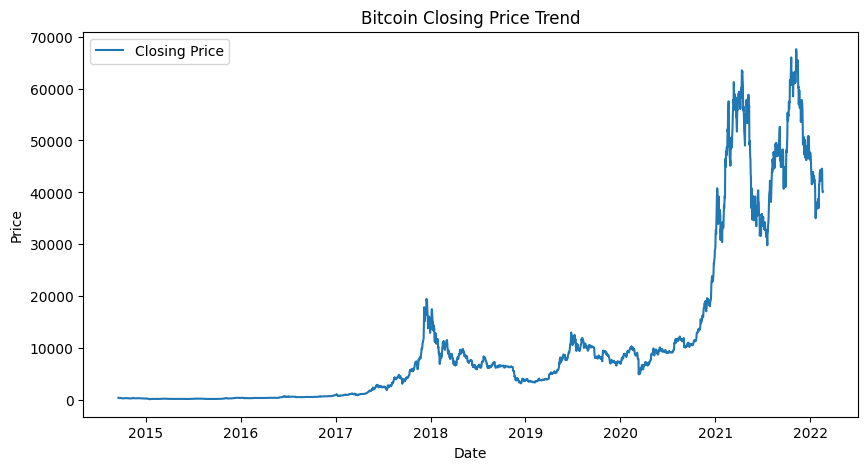

In [ ]:
import pandas as pd
# Load the dataset
df = pd.read_csv('/content/BTC-USD.csv')

# Display the first few rows
display(df.head())
# Check the size of the data
print(df.shape)

# Check the columns
print(df.columns)

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Visualize close price trends
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(pd.to_datetime(df['Date']), df['Close'], label='Closing Price')
plt.title('Bitcoin Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# New Section

In [ ]:
df.fillna(method='ffill', inplace=True)

/tmp/ipython-input-3-3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create lag features
df['Prev_Close'] = df['Close'].shift(1)
df['3_Day_Mean'] = df['Close'].rolling(window=3).mean()
df['7_Day_Mean'] = df['Close'].rolling(window=7).mean()

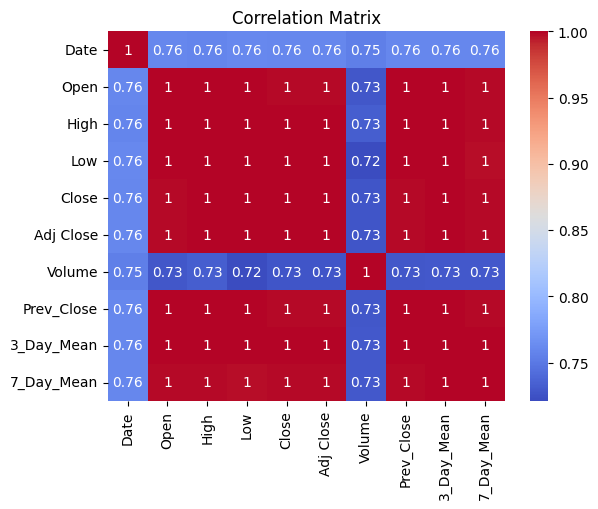

In [ ]:
import seaborn as sns

correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()